# Transfer Learning - ResNet50

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import keras

In [4]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
# from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import load_model,Model

##### ImageDataGenerator helps us to perform Data Augmentation

In [5]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

glob (short for global) is used to return all file paths that match a specific pattern

In [6]:
img_size = [224,224]

In [7]:
train_path = 'Cars Deep Data/Train'

In [8]:
test_path = 'Cars Deep Data/Test'

In [9]:
resnet = ResNet50(input_shape=img_size+[3],weights='imagenet',include_top=False)

In [10]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
# Do not train existing weights
for layer in resnet.layers:
    layer.trainable = False

###### glob is useful to get O/P classes

In [12]:
folders = glob('Cars Deep Data/Train/*')

In [13]:
folders

['Cars Deep Data/Train\\audi',
 'Cars Deep Data/Train\\lamborghini',
 'Cars Deep Data/Train\\mercedes']

In [14]:
len(folders)

3

In [15]:
x = Flatten()(resnet.output)

In [16]:
prediction = Dense(len(folders),activation='softmax')(x)

In [17]:
model = Model(inputs = resnet.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [21]:
train_data = train_datagen.flow_from_directory('Cars Deep Data/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                              )

Found 64 images belonging to 3 classes.


In [22]:
test_data = test_datagen.flow_from_directory('Cars Deep Data/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [23]:
r = model.fit_generator(train_data,
                       validation_data=test_data,
                       epochs=50,
                       steps_per_epoch = len(train_data),
                       validation_steps=len(test_data))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 5s 3s/step - loss: 4.9276 - accuracy: 0.3906 - val_loss: 6.7510 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 4s 2s/step - loss: 3.5101 - accuracy: 0.3906 - val_loss: 2.3942 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 1.8618 - accuracy: 0.4219 - val_loss: 2.4033 - val_accuracy: 0.3448
Epoch 4/50
2/2 [==============================] - 4s 2s/step - loss: 1.4590 - accuracy: 0.4844 - val_loss: 0.9845 - val_accuracy: 0.5517
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 1.0016 - accuracy: 0.5312 - val_loss: 1.1489 - val_accuracy: 0.5862
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.9406 - accuracy: 0.6250 - val_loss: 1.6058 - val_accuracy: 0.2931
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 0.9186 - accuracy: 0.5781 - val_l

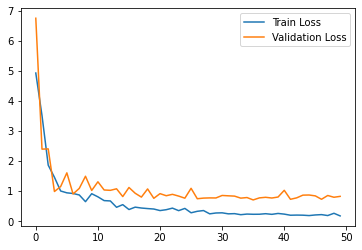

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

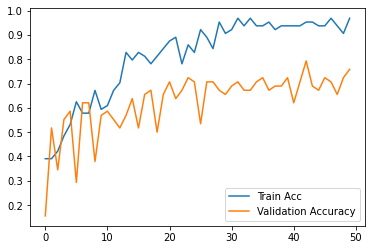

In [25]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [26]:
r.history

{'loss': [4.9275665283203125,
  3.510140895843506,
  1.8617709875106812,
  1.458970069885254,
  1.0015619993209839,
  0.9406259655952454,
  0.9186457395553589,
  0.869117021560669,
  0.6464747190475464,
  0.9113061428070068,
  0.8072801232337952,
  0.6818951368331909,
  0.6703128814697266,
  0.4597289562225342,
  0.5472385287284851,
  0.3844045400619507,
  0.4637928903102875,
  0.43477869033813477,
  0.41666948795318604,
  0.40149667859077454,
  0.3501546084880829,
  0.3790946900844574,
  0.4314362406730652,
  0.3476465046405792,
  0.4217272698879242,
  0.27650880813598633,
  0.3256482481956482,
  0.3508053421974182,
  0.2411579042673111,
  0.26959389448165894,
  0.27524322271347046,
  0.24132929742336273,
  0.24791395664215088,
  0.21290388703346252,
  0.2336713820695877,
  0.22660121321678162,
  0.22820886969566345,
  0.24578168988227844,
  0.22467002272605896,
  0.25427305698394775,
  0.23198141157627106,
  0.1950927972793579,
  0.19988368451595306,
  0.19652332365512848,
  0.183570

## Saving the model

In [29]:
from keras.models import load_model

In [30]:
model.save('resnet50_car.h5')

In [31]:
y_pred = model.predict(test_data)

In [32]:
y_pred

array([[3.93485129e-02, 8.40418994e-01, 1.20232433e-01],
       [1.40019441e-02, 8.29579890e-01, 1.56418160e-01],
       [3.54523491e-03, 9.73992288e-01, 2.24624909e-02],
       [8.17337446e-03, 9.85594094e-01, 6.23261929e-03],
       [3.19521539e-02, 9.18426275e-01, 4.96215113e-02],
       [4.67297912e-01, 1.67820707e-01, 3.64881337e-01],
       [4.27008886e-03, 8.45068991e-01, 1.50660887e-01],
       [8.67579699e-01, 1.13289535e-01, 1.91307366e-02],
       [4.01055992e-01, 5.96058011e-01, 2.88598286e-03],
       [1.61716677e-02, 2.97089756e-01, 6.86738610e-01],
       [1.02061182e-02, 5.17567456e-01, 4.72226441e-01],
       [8.44645500e-03, 9.80050385e-01, 1.15031945e-02],
       [3.89572717e-02, 6.29332125e-01, 3.31710637e-01],
       [9.55124506e-06, 2.17246469e-02, 9.78265822e-01],
       [8.16196978e-01, 1.55602619e-01, 2.82004625e-02],
       [3.80539089e-01, 5.77147603e-01, 4.23133187e-02],
       [3.44341472e-02, 2.45281104e-02, 9.41037714e-01],
       [1.32697243e-02, 9.71489

In [36]:
y_pred = np.argmax(y_pred,axis=1)

In [37]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2], dtype=int64)

In [38]:
model = load_model('resnet50_car.h5')

In [147]:
img = image.load_img('C:/Users/smast/Python Projects/Cars Deep Data/Test/lamborghini/10.jpg',target_size=(224,224))

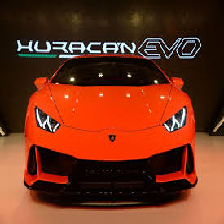

In [148]:
img

In [149]:
x = image.img_to_array(img)

In [150]:
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [151]:
x = x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [152]:
x.shape

(224, 224, 3)

In [153]:
x = np.expand_dims(x,axis=0)

In [154]:
x.shape

(1, 224, 224, 3)

In [155]:
from keras.applications.resnet50 import preprocess_input

In [156]:
img_data = preprocess_input(x)

In [157]:
img_data

array([[[[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         ...,
         [-103.939   , -116.77116 , -123.62902 ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.74763 , -123.60941 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.743706, -123.60549 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        ...,

        [[-103.57822 , -116.27312 , -1

In [158]:
img_data.shape

(1, 224, 224, 3)

In [159]:
model.predict(img_data)

array([[0.12823382, 0.5320437 , 0.3397225 ]], dtype=float32)

In [160]:
a = np.argmax(model.predict(img_data),axis=1)

In [161]:
a

array([1], dtype=int64)